In [1]:
!conda install -y -c conda-forge imbalanced-learn

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         110 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.8.1-pyhd8ed1ab_0



imbalanced-learn-0.8 | 110 KB    | ##################################### | 100% 
Preparing 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.utils import get_file


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
csv_files = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)
        
    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/botnet/UNSW_2018_IoT_Botnet_Full5pc_4.csv
/kaggle/input/botnet/UNSW_2018_IoT_Botnet_Full5pc_3.csv
/kaggle/input/botnet/UNSW_2018_IoT_Botnet_Full5pc_2.csv
/kaggle/input/botnet/UNSW_2018_IoT_Botnet_Full5pc_1.csv


In [3]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


In [4]:
print(df.category.unique())
print(df['category'].value_counts())

['DDoS' 'Normal' 'Reconnaissance' 'Theft' 'DoS']
DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64


In [5]:
df.head(2)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP


In [6]:
df.columns

Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

In [7]:
df = df[df['category'].isin(['DDoS', 'Normal', 'DoS'])]

In [8]:
# columns = ['flgs', 'proto', 'bytes', 'state', 'seq', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 
#           'rate', 'srate', 'drate']
# drop_columns = ['pkSeqID', 'flgs_number', 'proto_number', 'saddr', 'daddr', 'state_number', 
#                ]
# columns = [ 'stime', 'flgs',  
columns = ['seq', 'mean', 'stddev', 'max', 'min', 'state', 'flgs', 'stime', 'ltime', 'dur',
           'rate', 'sum', 'spkts', 'pkts', 'sbytes', 'bytes', 'srate', 'drate', 'dbytes', 'dpkts', 
          'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP']
# label = ['category']

categorical_columns = ['flgs', 'state']
numerical_columns = list(set(columns) - set(categorical_columns))
print(len(columns), '\n', len(categorical_columns), '\n', len(numerical_columns))

34 
 2 
 32


In [9]:
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split
X = df[columns]
y = df.category
labels = y.unique()
classes = y.nunique()
print("number of labels:", classes)
print("instances per label\n", y.value_counts())
print("labels:", labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

pipe = ColumnTransformer([("scaler", MinMaxScaler(), numerical_columns),
                          ("encoding", OneHotEncoder(handle_unknown='ignore'), categorical_columns)])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)
le = LabelEncoder()
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_test = le.transform(y_test)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)

# sampling
over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy={labels_dict['DDoS']:200000, labels_dict['DoS']:200000})
steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

number of labels: 3
instances per label
 DDoS      1926624
DoS       1650260
Normal        477
Name: category, dtype: int64
labels: ['DDoS' 'Normal' 'DoS']
instances per label in training set
 DDoS      1444967
DoS       1237695
Normal        358
Name: category, dtype: int64
instances per label in test set
 DDoS      481657
DoS       412565
Normal       119
Name: category, dtype: int64
{'DDoS': 0, 'DoS': 1, 'Normal': 2}
Counter({0: 200000, 1: 200000, 2: 200000})


In [10]:
# Autoencoder model to extract latent features

from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=3, mode='min')
input_shape = X_train.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 10
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
])
decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='Adam')

input shape: 47



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [11]:
history = autoencoder.fit(X_train, X_train, batch_size=64, 
                          epochs=20, validation_split=0.2)

2021-10-20 06:15:39.094008: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
7500/7500 [==============================] - 20s 3ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 2/20
7500/7500 [==============================] - 20s 3ms/step - loss: 2.7160e-04 - val_loss: 7.7194e-04
Epoch 3/20
7500/7500 [==============================] - 20s 3ms/step - loss: 2.2455e-04 - val_loss: 6.2312e-04
Epoch 4/20
7500/7500 [==============================] - 19s 3ms/step - loss: 1.9972e-04 - val_loss: 5.6410e-04
Epoch 5/20
7500/7500 [==============================] - 20s 3ms/step - loss: 1.6690e-04 - val_loss: 5.2505e-04
Epoch 6/20
7500/7500 [==============================] - 19s 3ms/step - loss: 1.4980e-04 - val_loss: 4.9134e-04
Epoch 7/20
7500/7500 [==============================] - 20s 3ms/step - loss: 1.3708e-04 - val_loss: 4.7611e-04
Epoch 8/20
7500/7500 [==============================] - 20s 3ms/step - loss: 1.2392e-04 - val_loss: 4.2291e-04
Epoch 9/20
7500/7500 [==============================] - 20s 3ms/step - loss: 1.1600e-04 - val_loss: 3.8752e-04
Epoch 10/

In [12]:
X_train_encode = encoder.predict(X_train)
# X_val_encode = encoder.predict(X_val)
X_test_encode = encoder.predict(X_test)

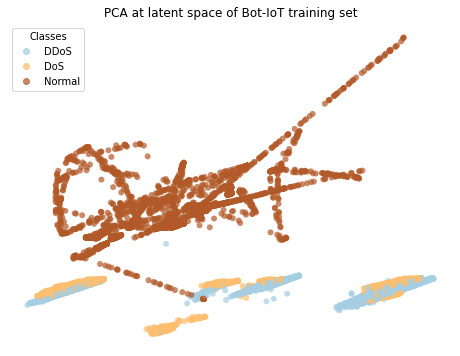

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
%matplotlib inline

X_train_pca, y_train_pca = resample(
    X_train_encode, y_train, n_samples=30000, random_state=42, stratify=y_train)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_train_pca)
fig, ax = plt.subplots(figsize=(8,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_train_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of Bot-IoT training set")
plt.show()

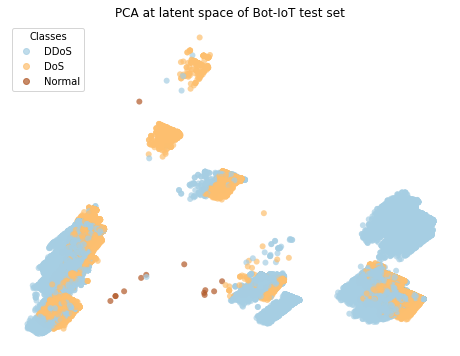

In [14]:
X_test_pca, y_test_pca = resample(
    X_test_encode, y_test, n_samples=100000, random_state=42, stratify=y_test)
pca = PCA(n_components=2)
projected = pca.fit_transform(X_test_pca)
fig, ax = plt.subplots(figsize=(8,6))
scat = ax.scatter(projected[:, 0], projected[:, 1],
            c=y_test_pca, edgecolor='none', cmap="Paired", alpha=0.7)
plt.legend(handles=scat.legend_elements()[0], labels=list(le.classes_), loc="upper left", title="Classes")
plt.axis('off')
plt.title("PCA at latent space of Bot-IoT test set")
plt.show()

In [15]:
classifier = Sequential()
classifier.add(Input(shape=(encoding_dim,)))
classifier.add(Dense(32, activation='relu'))
classifier.add(Dense(classes, activation='softmax'))
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = classifier.fit(X_train_encode,y_train, batch_size=64, epochs=20, 
                         validation_split=0.2, callbacks=[callback])

Epoch 1/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.3366 - accuracy: 0.8591 - val_loss: 2.5122e-04 - val_accuracy: 1.0000
Epoch 2/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.2198 - accuracy: 0.9107 - val_loss: 3.8003e-06 - val_accuracy: 1.0000
Epoch 3/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.2022 - accuracy: 0.9174 - val_loss: 2.0116e-06 - val_accuracy: 1.0000
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1919 - accuracy: 0.9229 - val_loss: 1.9115e-06 - val_accuracy: 1.0000
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1831 - accuracy: 0.9276 - val_loss: 1.6790e-06 - val_accuracy: 1.0000
Epoch 6/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1760 - accuracy: 0.9303 - val_loss: 6.4250e-07 - val_accuracy: 1.0000
Epoch 7/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1701 - accuracy: 0.9328 - v

In [16]:
# classifier.predict(X_train_encode)

In [17]:
# predicting on testing set
y_train_pred_prob = classifier.predict(X_train_encode)
y_test_pred_prob = classifier.predict(X_test_encode)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

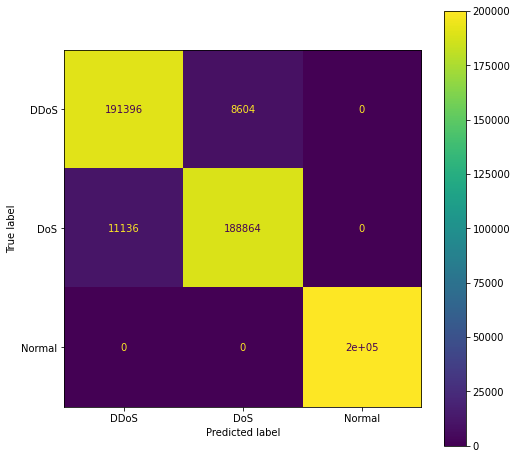

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_train, y_train_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(ax=ax)
plt.show()

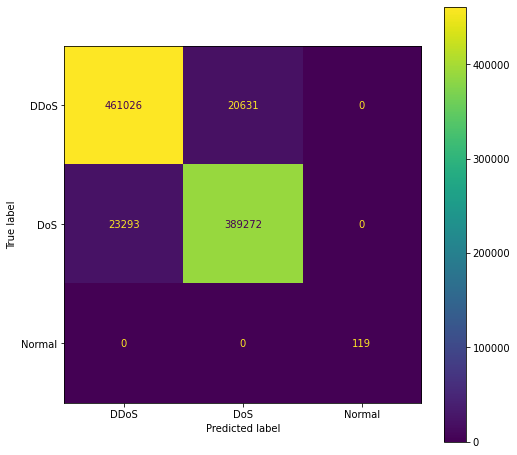

In [19]:
cm_test = confusion_matrix(y_test, y_test_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=le.classes_).plot(ax=ax)
plt.show()

In [20]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])

    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
#         fpr = fp / (fp + tn)
        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    
    return df_performance

In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y, labels, title): 
    y_cat = to_categorical(y)
#     pred_RFC_proba = classifier.predict(X)
#     y_score = pred_RFC_proba
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
    print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [22]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_true_labels = le.inverse_transform(y_train)
print(classification_report(y_train, y_train_pred, target_names=le.classes_))
performance = multilabel_matrix(y_train_true_labels, y_train_pred_labels, labels=le.classes_)
performance

              precision    recall  f1-score   support

        DDoS       0.95      0.96      0.95    200000
         DoS       0.96      0.94      0.95    200000
      Normal       1.00      1.00      1.00    200000

    accuracy                           0.97    600000
   macro avg       0.97      0.97      0.97    600000
weighted avg       0.97      0.97      0.97    600000



,accuracy,precision,recall,f1_score
DDoS,0.9671,0.945,0.957,0.951
DoS,0.9671,0.9564,0.9443,0.9503
Normal,1.0,1.0,1.0,1.0


In [23]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
print(classification_report(y_test, y_test_pred, target_names=le.classes_))
performance_test = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance_test

              precision    recall  f1-score   support

        DDoS       0.95      0.96      0.95    481657
         DoS       0.95      0.94      0.95    412565
      Normal       1.00      1.00      1.00       119

    accuracy                           0.95    894341
   macro avg       0.97      0.97      0.97    894341
weighted avg       0.95      0.95      0.95    894341



,accuracy,precision,recall,f1_score
DDoS,0.9509,0.9519,0.9572,0.9545
DoS,0.9509,0.9497,0.9435,0.9466
Normal,1.0,1.0,1.0,1.0


n_classes: 3


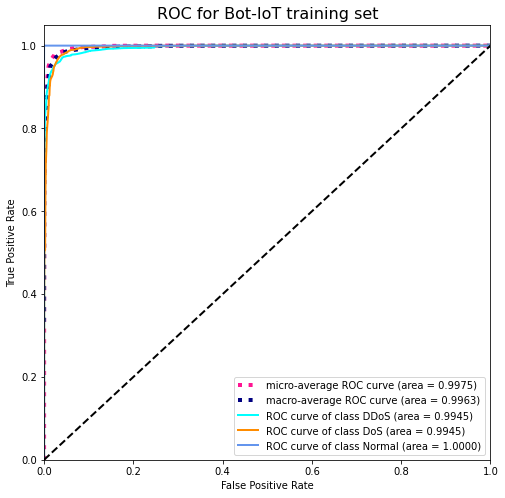

In [24]:
RoC_Curve(y_train_pred_prob, y_train, le.classes_, title='ROC for Bot-IoT training set')

n_classes: 3


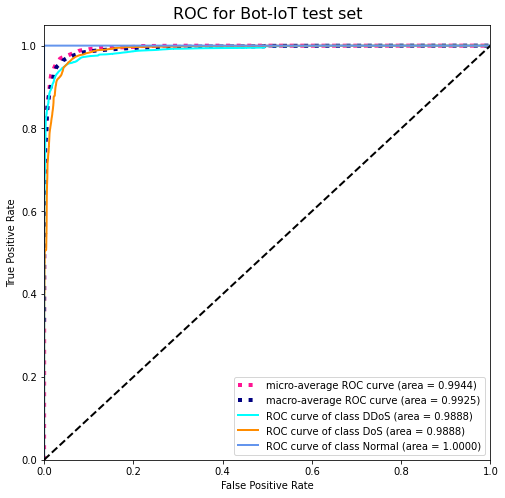

In [25]:
RoC_Curve(y_test_pred_prob, y_test, le.classes_, title='ROC for Bot-IoT test set')